In [27]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [29]:
data = pd.read_csv("/content/drive/MyDrive/ML/data.csv",header = 0)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [31]:
data.drop(columns = ['id','Unnamed: 32'], axis=1, inplace=True)

In [32]:
missing_values = data.isnull().sum()
print(missing_values)

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [33]:
duplicate_val = data.duplicated()
print(duplicate_val.sum())

0


In [34]:
dg_distribution = data['diagnosis'].value_counts().reset_index()
dg_distribution.columns = ['Diagnosis', 'Count']

colors = {'M': 'purple', 'B': 'skyblue'}

fig = px.bar(dg_distribution, x='Diagnosis', y='Count', color='Diagnosis',
             color_discrete_map=colors, title='Distribution of Malignant (M) and Benign (B) Diagnoses',
             labels={'Diagnosis': 'Diagnosis', 'Count': 'Count'})

fig.update_layout(showlegend=False)
fig.update_traces(marker_line_width=0)

fig.show()

In [35]:
feature_sum = data.drop('diagnosis', axis=1).describe()
feature_sum

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


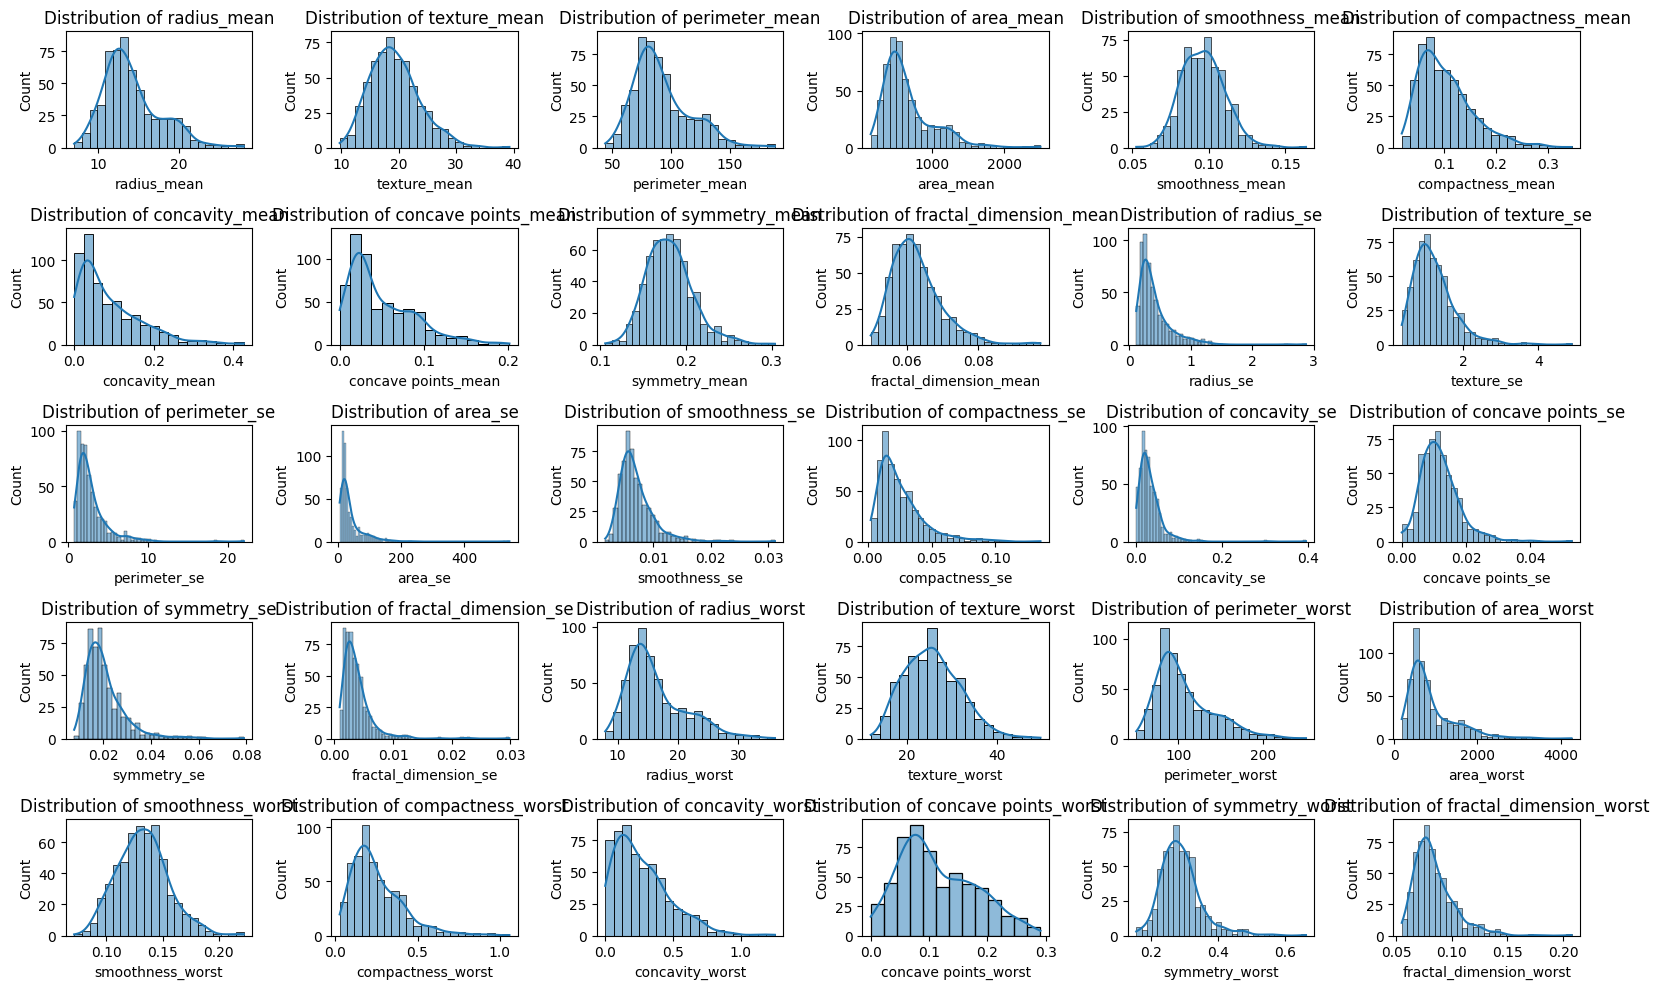

In [36]:
num_features = data.drop('diagnosis', axis=1)

plt.figure(figsize=(16, 10))
for i, feature in enumerate(num_features.columns, 1):
    plt.subplot(5, 6, i)
    sns.histplot(num_features[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [37]:
data['diagnosis'] = data['diagnosis'].map({'M': 0, 'B': 1})

In [38]:
correlation_matrix = data.corr()
target_correlation = correlation_matrix['diagnosis'].sort_values(ascending=False)
fig_target = px.bar(x=target_correlation.index, y=target_correlation.values,
                    labels={'x': 'Features', 'y': 'Correlation'},
                    title='Correlation of Features with Diagnosis (Target Variable)',
                    width=1000, height=800)
fig_target.show()

In [39]:
selected_features = ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst',
                      'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'compactness_mean','radius_se','area_se','perimeter_se']
selected_features.append('diagnosis')
selected_df = data[selected_features]

In [40]:
X = selected_df.drop('diagnosis', axis=1)
y = selected_df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'k-Nearest Neighbors': KNeighborsClassifier()
}

In [ ]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results[model_name] = {
        'Accuracy (Train)': accuracy_train,
        'Accuracy (Test)': accuracy_test,
        'Confusion Matrix': confusion_matrix(y_test, y_pred_test),
        'Classification Report': classification_report(y_test, y_pred_test),
    }

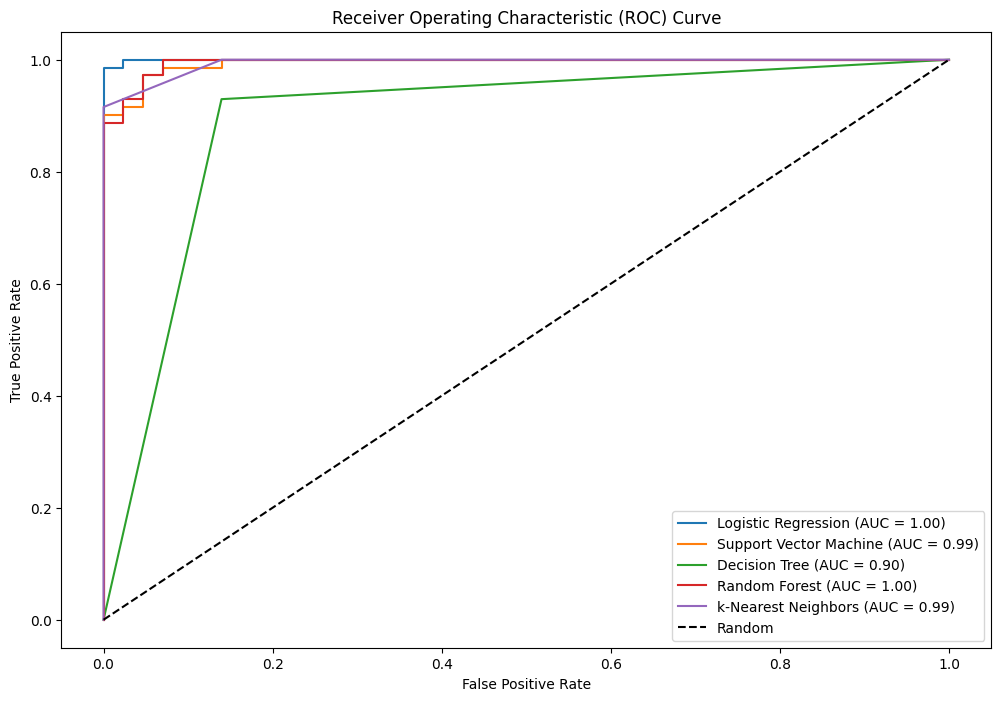

In [43]:
plt.figure(figsize=(12, 8))
for model_name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    y_true_binary = LabelEncoder().fit_transform(y_test)
    if np.isnan(y_true_binary).any():
        raise ValueError("Input y_true contains NaN values.")

    fpr, tpr, _ = roc_curve(y_true_binary, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Logistic Regression:

Accuracy (Train): 0.94
Accuracy (Test): 0.99


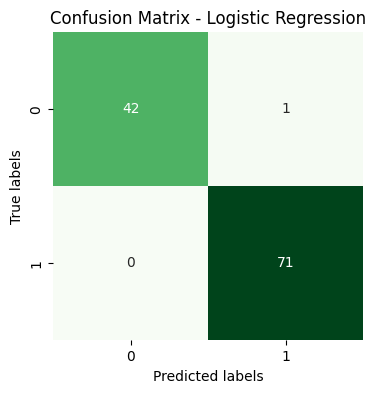


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

--------------------------------------------------

Support Vector Machine:

Accuracy (Train): 0.91
Accuracy (Test): 0.95


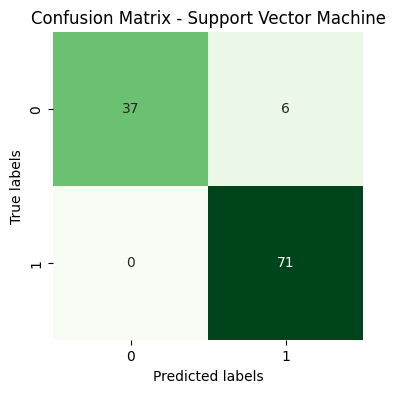


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

--------------------------------------------------

Decision Tree:

Accuracy (Train): 1.00
Accuracy (Test): 0.90


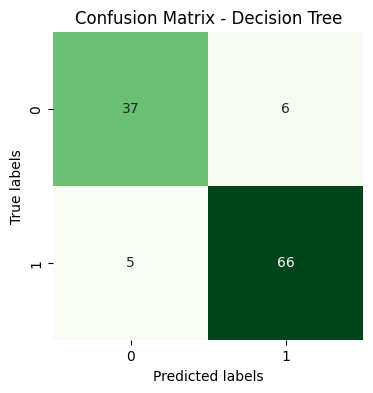


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        43
           1       0.92      0.93      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114

--------------------------------------------------

Random Forest:

Accuracy (Train): 1.00
Accuracy (Test): 0.96


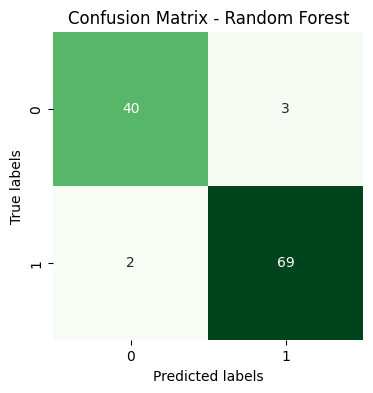


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

--------------------------------------------------

k-Nearest Neighbors:

Accuracy (Train): 0.94
Accuracy (Test): 0.95


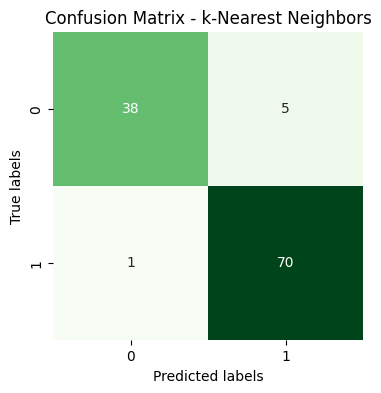


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.93      0.99      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

--------------------------------------------------


In [44]:
for model_name, metrics in results.items():
    print(f'\n{model_name}:\n')
    print(f"Accuracy (Train): {metrics['Accuracy (Train)']:.2f}")
    print(f"Accuracy (Test): {metrics['Accuracy (Test)']:.2f}")

    plt.figure(figsize=(4, 4))
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='g', cmap='Greens', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
    print("\nClassification Report:")
    print(metrics['Classification Report'])

    print('-' * 50)

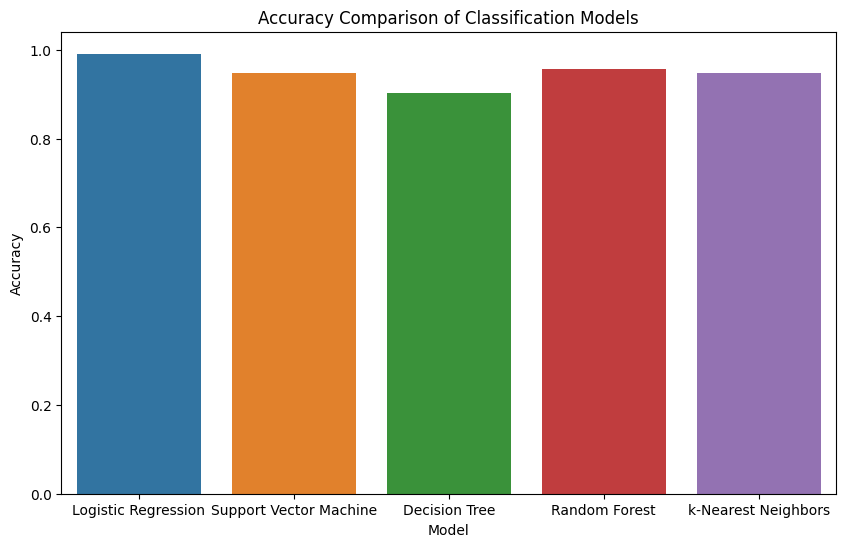

In [45]:
accuracy_comparison = pd.DataFrame.from_dict(results, orient='index')['Accuracy (Test)'].reset_index()
accuracy_comparison.columns = ['Model', 'Accuracy']

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_comparison)
plt.title('Accuracy Comparison of Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()